# Generation of supplemental materials for the MRIQC paper

This notebook is associated to the paper:

Esteban O, Birman D, Schaer M, Koyejo OO, Poldrack RA, Gorgolewski KJ; MRIQC: Predicting Quality in Manual MRI Assessment Protocols Using No-Reference Image Quality Measures; bioRxiv 111294; doi:[10.1101/111294](https://doi.org/10.1101/111294).

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os.path as op
import numpy as np
import pandas as pd
from mriqc.viz import misc as mviz
from pkg_resources import resource_filename as pkgrf
outputs_path = '../../mriqc-data/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
x_path = pkgrf('mriqc', 'data/csv/x_abide-0.9.6-2017-06-03-99db97c9be2e.csv')
y_path = pkgrf('mriqc', 'data/csv/y_abide.csv')
ds030_x_path = pkgrf('mriqc', 'data/csv/x_ds030-0.9.6-2017-06-03-99db97c9be2e.csv')
ds030_y_path = pkgrf('mriqc', 'data/csv/y_ds030.csv')

rater_types = {'rater_1': float, 'rater_2': float, 'rater_3': float}
mdata = pd.read_csv(y_path, index_col=False, dtype=rater_types)

sites = list(sorted(list(set(mdata.site.values.ravel().tolist()))))

/home/oesteban/.anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_pdf.py:1121: UserWarning: 'FreeSans.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
  warnings.warn(msg % os.path.basename(filename))


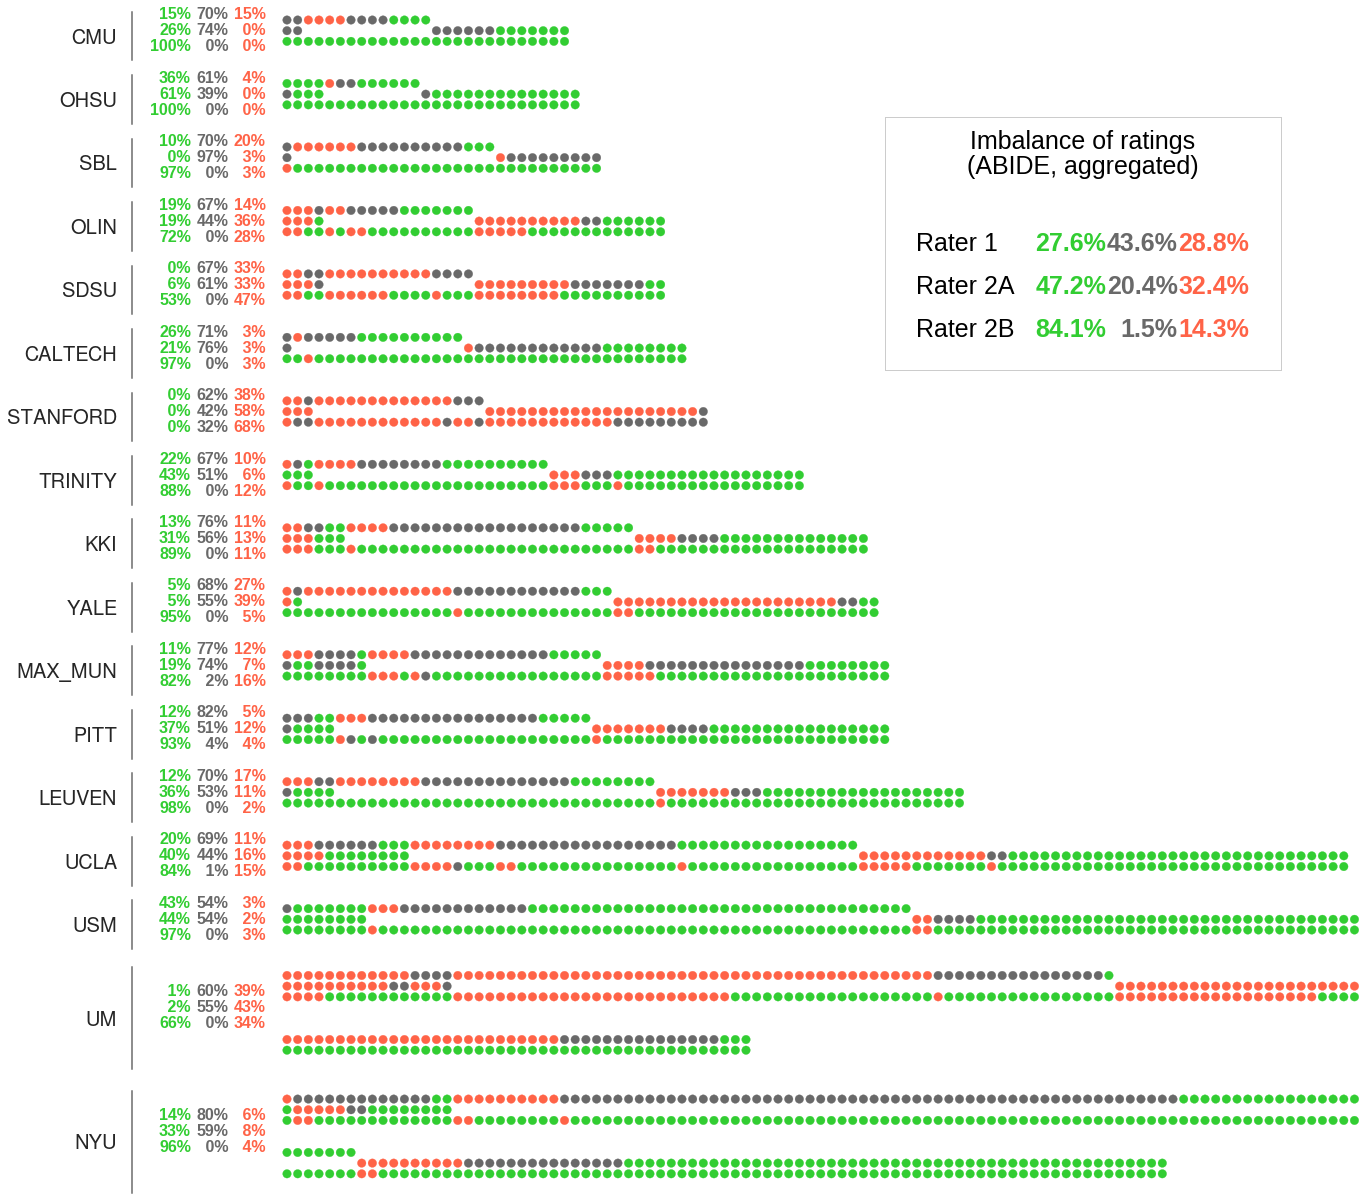

In [6]:
fig = mviz.raters_variability_plot(
    mdata, raters=['rater_1', 'rater_2', 'rater_3'], 
    rater_names=['Rater 1', 'Rater 2A', 'Rater 2B'],
    out_file=op.join(outputs_path, 'figures', 'suppl-fig02.pdf'),
    only_overlap=False)

0.290002488181


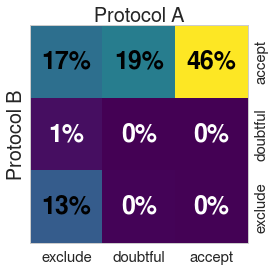

In [9]:
from sklearn.metrics import cohen_kappa_score
overlap = mdata[np.all(~np.isnan(mdata[['rater_2', 'rater_3']]), axis=1)]
y1 = overlap.rater_2.values.ravel().tolist()
y2 = overlap.rater_3.values.ravel().tolist()
print(cohen_kappa_score(y1, y2))
fig = mviz.inter_rater_variability(y1, y2, raters=['Protocol A', 'Protocol B'])

/home/oesteban/.anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


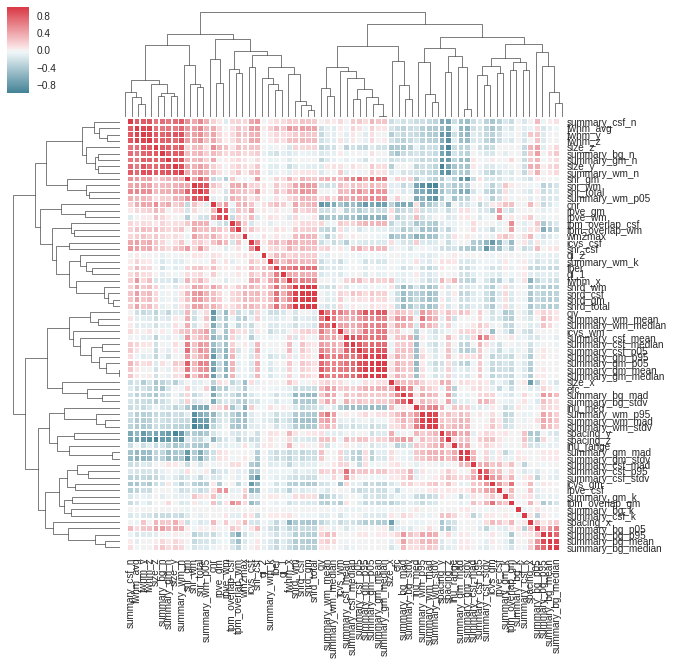

In [10]:
fig = mviz.plot_corrmat(x_path)

In [11]:
fig = mviz.plot_histograms(x_path, y_path)

NameError: name 'zscore_dataset' is not defined